In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calculate_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

In [6]:
def divisive_hierarchical_clustering(points):
    # Initialize one cluster containing all data points
    clusters = [points]
    
    while len(clusters) < len(points):
        cluster_to_divide = clusters[0]
        current_distance = float('-inf')
        divide_index = None
        
        # Find the two points that are farthest apart in the current cluster
        for i, point1 in enumerate(cluster_to_divide):
            for j, point2 in enumerate(cluster_to_divide[i+1:], start=i+1):
                distance = calculate_distance(point1, point2)
                if distance > current_distance:
                    current_distance = distance
                    divide_index = (i, j)
        
        # Divide the cluster into two based on the farthest points
        try:
            cluster1 = cluster_to_divide[:divide_index[1]]
            cluster2 = cluster_to_divide[divide_index[1]:]
        except:
            print("Error")
        # Update the list of clusters
        clusters = clusters[1:] + [cluster1, cluster2]
    
    return clusters

In [7]:
# Generate example data (blobs dataset)
np.random.seed(42)
X = np.random.rand(10, 2)

# Perform divisive hierarchical clustering
clusters = divisive_hierarchical_clustering(X)

Error
Error


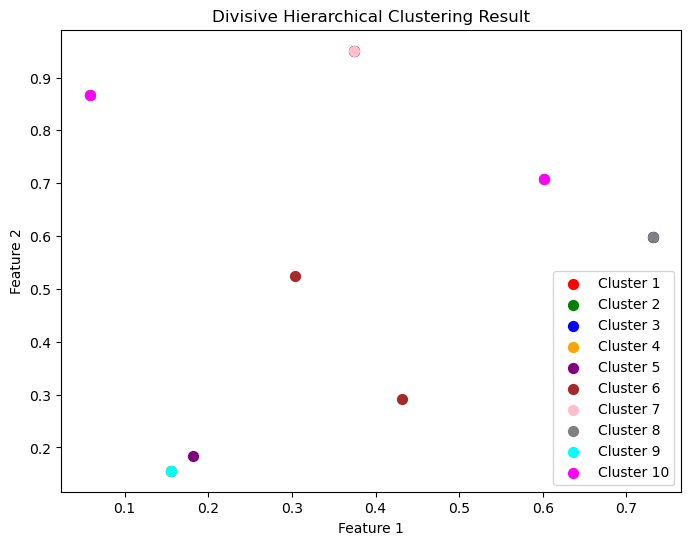

In [8]:
# Plot the clustering result
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i], label=f'Cluster {i+1}', s=50)

plt.title("Divisive Hierarchical Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
